##### Importación de librerías

In [60]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt


# Visualizamos la imagen el texto y la mezcla de estes con un or 

##### Debemos comprobar que tanto imagen como texto estean con las mismas dimensiones, sino se hara un resize

Text(0.5, 1.0, 'mezcla')

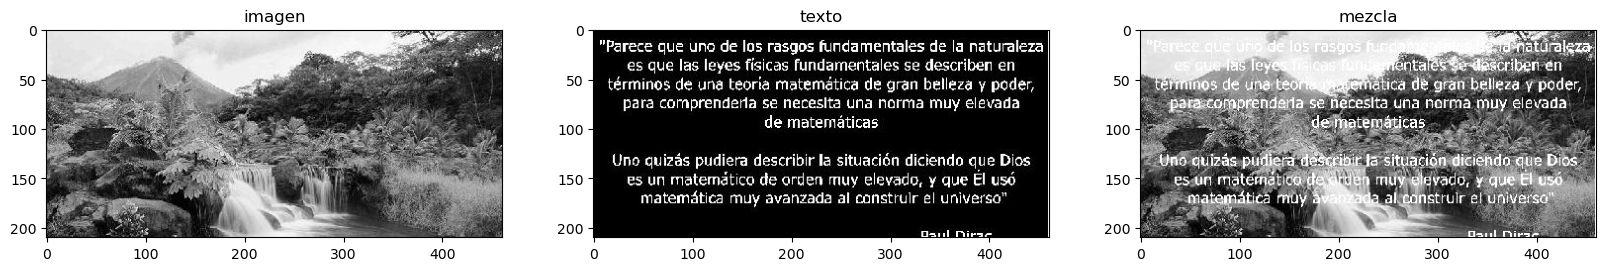

In [61]:
src1 = cv.imread("imagenes/paisaje_foto.jpeg")
src2 = cv.imread("imagenes/paisaje_texto.jpeg")
fondo = cv.cvtColor(src1, cv.COLOR_RGB2GRAY)
letras = cv.cvtColor(src2, cv.COLOR_RGB2GRAY)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
original= cv.bitwise_or(fondo,letras)


ax1.imshow(fondo, cmap="gray");ax1.set_title("imagen")
ax2.imshow(letras, cmap="gray");ax2.set_title("texto")
ax3.imshow(original, cmap="gray");ax3.set_title('mezcla')



### Aplicamos un filtro Gausiano a la imagen que nos servirá para su restauración

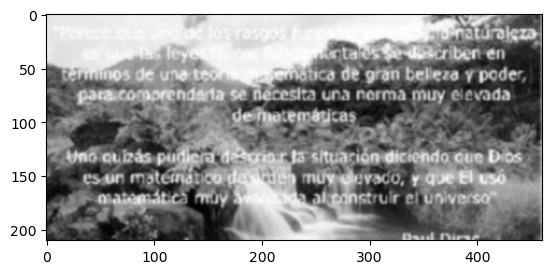

In [62]:

filtro_gausiano = cv.GaussianBlur(src=original, ksize=(5,5), sigmaX=0, sigmaY=0 )
plt.imshow(filtro_gausiano,cmap='gray')

##### Empregamos sobre a máscara de letras un not para sacalas en negra

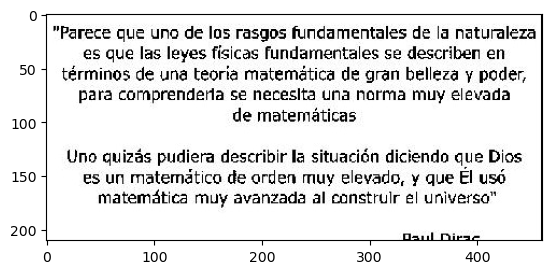

In [85]:
img_letrasnegras = cv.bitwise_not(letras)
plt.imshow(img_letrasnegras,cmap='gray')

##### Empregamos un and para unir as letras negras anteriormente xeradas e a imaxe orixinal con letras

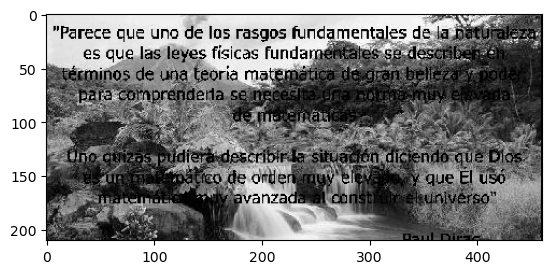

In [64]:
img_letrasnegras_fondo = cv.bitwise_and(img_letrasnegras,original)
plt.imshow(img_letrasnegras_fondo,cmap='gray')

##### Agora realizamos un and por outra banda do filtro gausiano e as letras

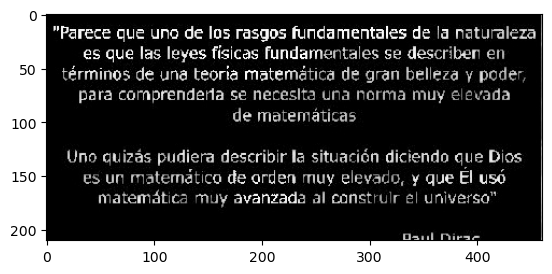

In [65]:
img_letrasnegras_fondogaus = cv.bitwise_and(filtro_gausiano,letras)
plt.imshow(img_letrasnegras_fondogaus,cmap='gray')

##### Finalmente realizamos un or das letras co fondo gausiano e a mestura das letras negras coa imaxe orixinal 

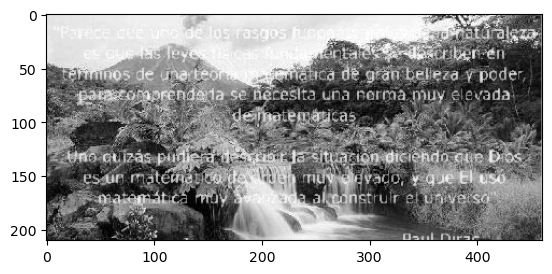

In [71]:
final = cv.bitwise_or(img_letrasnegras_fondogaus,img_letrasnegras_fondo)
plt.imshow(final,cmap='gray')

##### Agora podemos facer a proba cun bucle para restaurar o máximo posible a imaxe

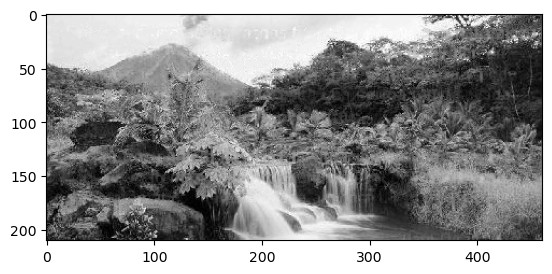

In [83]:
src1 = cv.imread("imagenes/paisaje_foto.jpeg")
src2 = cv.imread("imagenes/paisaje_texto.jpeg")
fondo = cv.cvtColor(src1, cv.COLOR_RGB2GRAY)
letras = cv.cvtColor(src2, cv.COLOR_RGB2GRAY)
original= cv.bitwise_or(fondo,letras)
for i in range(5):
    filtro_gausiano = cv.GaussianBlur(src=original, ksize=(5,5), sigmaX=0, sigmaY=0)
    img_letrasnegras = cv.bitwise_not(letras)
    img_letrasnegras_fondogaus = cv.bitwise_and(filtro_gausiano,letras)
    final = cv.bitwise_or(img_letrasnegras_fondogaus,img_letrasnegras_fondo)
    original=final.copy()

plt.imshow(final,cmap='gray')


